# Section B. Prediction Uncertainty with Bootstrapping

This section is the adaptation of Activity 2 from KNN classification to KNN regression. You use the bootstrapping technique to quantify the uncertainty of predictions for the KNN regressor that you implemented in Section A. Background. Please refer to the background in Section A.


### Question 3 [Bootstrapping, 25 Marks]
    I. Modify the code in Activity 2 to handle bootstrapping for KNN regression.


#### Importing the Libraries

In [1]:
# load libraries:
library(reshape2)
library(ggplot2)


#### Bootstrap function

In [2]:
# define a function that generates sample indixes based on bootstrap technique

set.seed(1234)
boot <- function (original.size=100, sample.size=original.size, times=10){
    indx <- matrix(nrow=times, ncol=sample.size)
    for (t in 1:times){
        indx[t, ] <- sample(x=original.size, size=sample.size, replace = TRUE)
    }
    return(indx)
}

#### KNN Regressor 

In [3]:
# KNN function
knn <- function(train.data, train.label, test.data, K=3){

    ## count number of train and test samples
    train.len <- nrow(train.data)
    test.len <- nrow(test.data)
    
    ## calculate distances between samples
    dist <- as.matrix(dist(rbind(test.data, train.data), method= 'manhattan'))[1:test.len, (test.len+1):(test.len+train.len)]
    
    ## for each test sample...
    for (i in 1:test.len){
        
        ### ...find its K nearest neighbours from training sampels...
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        
        ###... and calculate the predicted labels according to the majority vote
        test.label[i]<- sum(train.label[nn])/K
    }
    
    ## return the class labels as output
    return (round(test.label,3))
}

    II. Load Task1B_tran.csv and Task1B_test.csv sets. Apply your bootstrapping for KNN regression wth times = 50 (the number of subsets), size = 20 (the size of each subse), and change K=1,.., 15 (the neighbourhood size). Now create a boxplot where the x-axis is K, and the y-axis is the averageerror (and the uncertainty around it) corresponding to each K. Save the plot in our Jupyter Notebook file for Question 3. 
Hint: You can refer to the boxplot in Activity 2 of Module 1. But the error is measured in different ways compared with the KNN classifier.

#### Importing the Data

In [4]:
train <- read.csv("data\\Sintetic1B_train.csv")
test <- read.csv("data\\Sintetic1B_test.csv")

In [5]:
# create training and testing datasets:
train.index = 1:nrow(train)
train.data <- scale(train[train.index, -5])
train.label <- train[train.index, 5]
test.data <- scale(test[train.index, -5])
test.label <- test[train.index, 5]

#### Application on KNN Regressor

In [6]:
# fix the parameters
K <- 15         # Maximum K for KNN 
L <- 50         # number of datasets
N <- 20         # size of datasets

# generate bootstrap indices:
boot.indx <- boot(nrow(train.data), N, L)

# a dataframe to track the number of missclassified samples in each case
error <- data.frame('K'=1:K, 'L'=1:L, 'test'=rep(0,L*K))

# THIS MAY TAKE A FEW MINUTES TO COMPLETE
## for every k values:
for (k in 1: K){
    
    ### for every dataset sizes:
    for (l in 1:L){
        
        #### calculate iteration index i
        i <- (k-1)*L+l
        
        #### save sample indices that were selected by bootstrap
        indx <- boot.indx[l,]
        
        #### save the value of k and l
        error[i,'K'] <- k
        error[i,'L'] <- l
        
        #### calculate and record the train and test missclassification rates
        error[i,'test'] <-  sum((knn(train.data[indx, ], train.label[indx], test.data, K=k)  - test.label)^2)/nrow(test.data)
    } 
}

In [7]:
error.m <- melt(error, id=c('K', 'L')) # reshape for visualization
names(error.m) <- c('K', 'L', 'type', 'error')

#### Boxplot

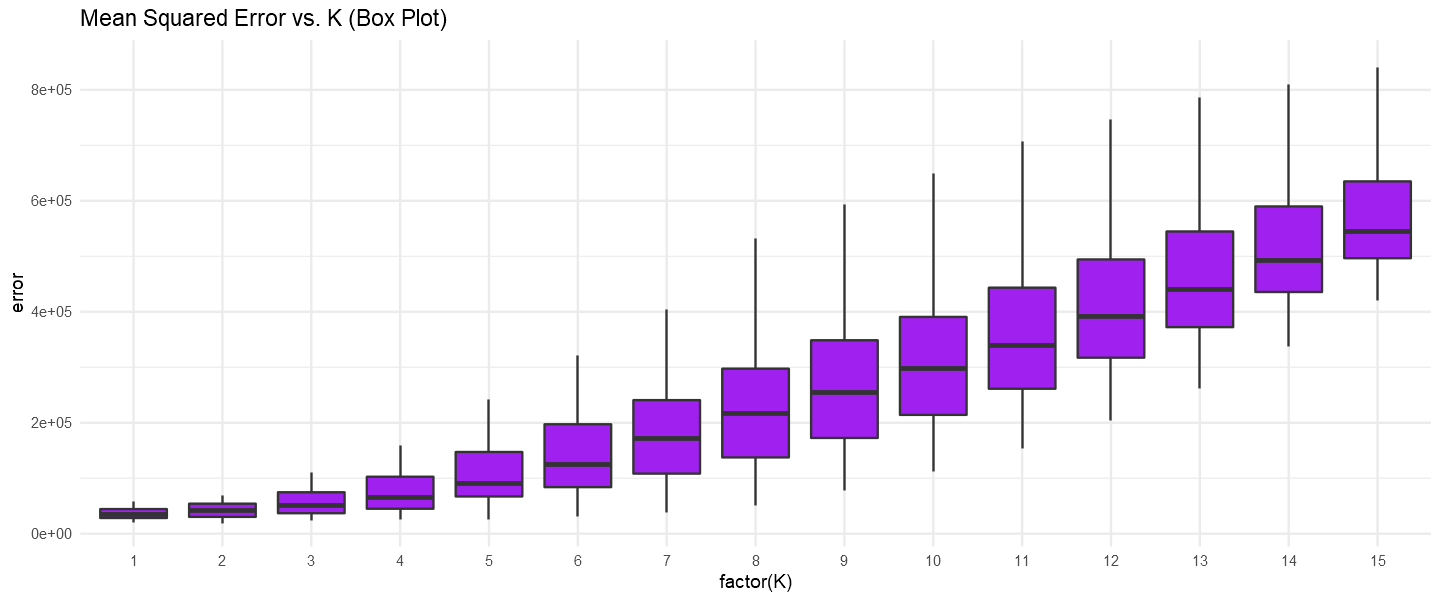

In [8]:
options(repr.plot.width=12, repr.plot.height=5) # area of display

ggplot(data=error.m[error.m$type=='test',], aes(factor(K), error)) + geom_boxplot(outlier.shape = NA, fill = "purple")  + 
    scale_color_discrete(guide = guide_legend(title = NULL)) + 
    ggtitle('Mean Squared Error vs. K (Box Plot)') + theme_minimal()
# ignore the warnings (because of ignoring outliers)
options(warn=-1)

    III. Based on the plot in the previous part (Part II), how does the test error and its uncertainty behave as K increases? Explain in your Jupyter Notebook file.

- **As K increases we can see a constant increase in the median of the test error. This is expected because as we have previously discussed, a small K means more model complexity and higher tendency for overfitting and a big K means the opposite, underfitting and less model complexity**. 
- **On the other hand, as K increases we can see a general trend of more uncertainty in the model, which is consequence of the poor predictive power of model. Since we are working with relatevely small subsets that not necesseraly represent the distribution of the dataset, the model is returning diffenrent predictions with a big range from predicted points.**

    IV. Load Task1B_train.csv and Task1B_test.csv sets. Apply your bootstrapping for KNN regression with K= 5(the neighbourhood size), times = 50 (the number of subsets), and change sizes = 5, 10, 15,..., 75 (the size of each subset). Now create a boxplot where the x-axis is ‘sizes’ and the y-axis is the average error (and the uncertainty around it) corresponding to each value of ‘times’. Save the plot in your Jupyter Notebook file for Question 3.

In [ ]:
# fix the parameters
K <- 5                # Maximum K for KNN 
L <- 50               # number of datasets
N <- seq(5,75,5)      # size of datasets


# a dataframe to track the number of missclassified samples in each case
error <- data.frame(K, 'L'=1:L, 'test'=rep(0,L*length(N)))

for (n in N){

    # generate bootstrap indices:
    boot.indx <- boot(nrow(train.data), n, L)

    ### for every dataset sizes:
    for (l in 1:L){

        #### calculate iteration index i
        i <- (n/5-1)*L+l

        #### save sample indices that were selected by bootstrap
        indx <- boot.indx[l,]

        #### save the value of k and l
        error[i,'N'] <- n
        error[i,'L'] <- l

        #### calculate and record the train and test missclassification rates
        error[i,'test'] <-  sum((knn(train.data[indx, ], train.label[indx], test.data, K=5)  - test.label)^2)/nrow(test.data) 
    }
}

In [ ]:
# plot misclassification percentage for train and test data sets
error.m <- melt(error, id=c('N', 'L')) # reshape for visualization
names(error.m) <- c('N', 'L', 'type', 'miss')

ggplot(data=error.m[error.m$type=='test',], aes(factor(N), miss)) + geom_boxplot(outlier.shape = NA, fill = "purple")  + 
    scale_color_discrete(guide = guide_legend(title = NULL)) + 
    ggtitle('Error vs. Sample Size') + theme_minimal()
# ignore the warnings (because of ignoring outliers)
options(warn=-1)

    V. Based on the plot in the previous part (Part IV), how does the test error and its uncertainty behave as the size of each subset in bootstrapping increases? Explain in your Jupyter Notebook file.

- **As the data of the subsets increase there is a constant trend of decrease in the error rate. This is expected and intuitive, because in KNN, as in all machine learning models, the predictive power of the model is extracted from the data. Usually adding more data to a model will increase its accuracy, because the model will have a better fit to the test data. For instance, by extracting a small subset randomly from a big dataset, one can be unlucky and get observations that do not represent the distribuitons of the points from the dataset. However, when we increase the amount of data of the subset, it is very unlikely that the subset will not reflect the original distribution of observations. With respect to KNN it may occur, for instance, because the closest points will not be on the trainning data when calculating the distance and in conseuquence perform a poor prediction**.
- **The same is true for the uncertainty of the model, which means, there is a general trend of less variance as the dataset increases in size. If we are working with big subsets sampled for the data, it is likely that the model will retunr similar outcomes and therefore have similar results and less variance. The mathematical explanation behind the fact that adding more data reduces uncertainty may be understood with help of the central limit theorem, but we will not elaborate in this question about as we beleive it is not the purpose**.